# Superstore

Selamat datang di analisis data Superstore!  
Notebook ini berisi eksplorasi, visualisasi, dan insight dari dataset penjualan Superstore, mulai dari pembersihan data, analisis sub-kategori, tren waktu, hingga analisis geografis dan diskon.  
Setiap langkah didokumentasikan dengan jelas untuk memudahkan pemahaman dan pengembangan lebih lanjut.

## Pertanyaan Kunci Analisis Data Superstore

1. **APA yang laku dan apa yang tidak?**  
    - Produk atau sub-kategori apa yang paling banyak terjual dan memberikan profit tertinggi?
    - Produk atau sub-kategori mana yang justru kurang laku atau bahkan menyebabkan kerugian?

2. **MENGAPA ada kerugian?**  
    - Faktor apa saja yang menyebabkan beberapa produk atau wilayah mengalami kerugian?
    - Apakah diskon, biaya pengiriman, atau faktor lain yang paling berpengaruh terhadap profit negatif?

3. **DI MANA letak kekuatan dan kelemahan pasar?**  
    - Wilayah atau negara bagian mana yang menjadi sumber profit terbesar?
    - Di mana saja pasar yang justru menjadi titik lemah atau penyumbang kerugian?

4. **KAPAN waktu terbaik untuk menjual?**  
    - Bagaimana pola penjualan dan profit sepanjang tahun?
    - Bulan atau periode apa yang menunjukkan lonjakan penjualan tertinggi dan kapan waktu yang kurang optimal untuk penjualan?

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi agar terlihat menarik
sns.set_style("whitegrid")

1. Memuat dan Membersihkan Data

In [37]:
try:
    # Membaca file CSV
    df = pd.read_csv('Superstore.csv', encoding='latin1')
    print("File berhasil dimuat!")
except FileNotFoundError:
    print("Error: File tidak ditemukan.")
    # Jika file tidak ditemukan, hentikan eksekusi
    # Anda bisa menempatkan sisa kode di bawah ini setelah berhasil memuat data

# Menampilkan informasi dasar tentang dataset
print("\nInfo Dataset:")
df.info()

File berhasil dimuat!

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          

In [38]:
# Menampilkan seluruh kolom pada 5 baris pertama dataframe
pd.set_option('display.max_columns', None)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [39]:
# Mengubah kolom 'Order Date' menjadi format tanggal yang bisa dianalisis
df['Order Date'] = pd.to_datetime(df['Order Date'])

2. Menganalisis Kinerja Sub-Kategori

In [40]:
# Mengelompokkan data berdasarkan 'Sub-Category' dan menghitung total Penjualan dan Laba
sub_category_performance = df.groupby('Sub-Category').agg({'Sales': 'sum', 'Profit': 'sum'})

sub_category_performance

,Sales,Profit
Sub-Category,,
Accessories,167380.3180,41936.6357
Appliances,107532.1610,18138.0054
Art,27118.7920,6527.7870
Binders,203412.7330,30221.7633
Bookcases,114879.9963,-3472.5560
Chairs,328449.1030,26590.1663
Copiers,149528.0300,55617.8249
Envelopes,16476.4020,6964.1767
Fasteners,3024.2800,949.5182


In [41]:
# Mengurutkan data untuk visualisasi
profit_sorted = sub_category_performance.sort_values(by='Profit', ascending=False)

print(f'{profit_sorted}\n')

                    Sales      Profit
Sub-Category                         
Copiers       149528.0300  55617.8249
Phones        330007.0540  44515.7306
Accessories   167380.3180  41936.6357
Paper          78479.2060  34053.5693
Binders       203412.7330  30221.7633
Chairs        328449.1030  26590.1663
Storage       223843.6080  21278.8264
Appliances    107532.1610  18138.0054
Furnishings    91705.1640  13059.1436
Envelopes      16476.4020   6964.1767
Art            27118.7920   6527.7870
Labels         12486.3120   5546.2540
Machines      189238.6310   3384.7569
Fasteners       3024.2800    949.5182
Supplies       46673.5380  -1189.0995
Bookcases     114879.9963  -3472.5560
Tables        206965.5320 -17725.4811



In [42]:
sales_sorted = sub_category_performance.sort_values(by='Sales', ascending=False)

print(f'{sales_sorted}\n')

                    Sales      Profit
Sub-Category                         
Phones        330007.0540  44515.7306
Chairs        328449.1030  26590.1663
Storage       223843.6080  21278.8264
Tables        206965.5320 -17725.4811
Binders       203412.7330  30221.7633
Machines      189238.6310   3384.7569
Accessories   167380.3180  41936.6357
Copiers       149528.0300  55617.8249
Bookcases     114879.9963  -3472.5560
Appliances    107532.1610  18138.0054
Furnishings    91705.1640  13059.1436
Paper          78479.2060  34053.5693
Supplies       46673.5380  -1189.0995
Art            27118.7920   6527.7870
Envelopes      16476.4020   6964.1767
Labels         12486.3120   5546.2540
Fasteners       3024.2800    949.5182



3. Membuat Visualisasi

C:\Users\Dion\AppData\Local\Temp\ipykernel_8176\3117272836.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_sorted['Sales'], y=sales_sorted.index, palette="plasma", orient='h')


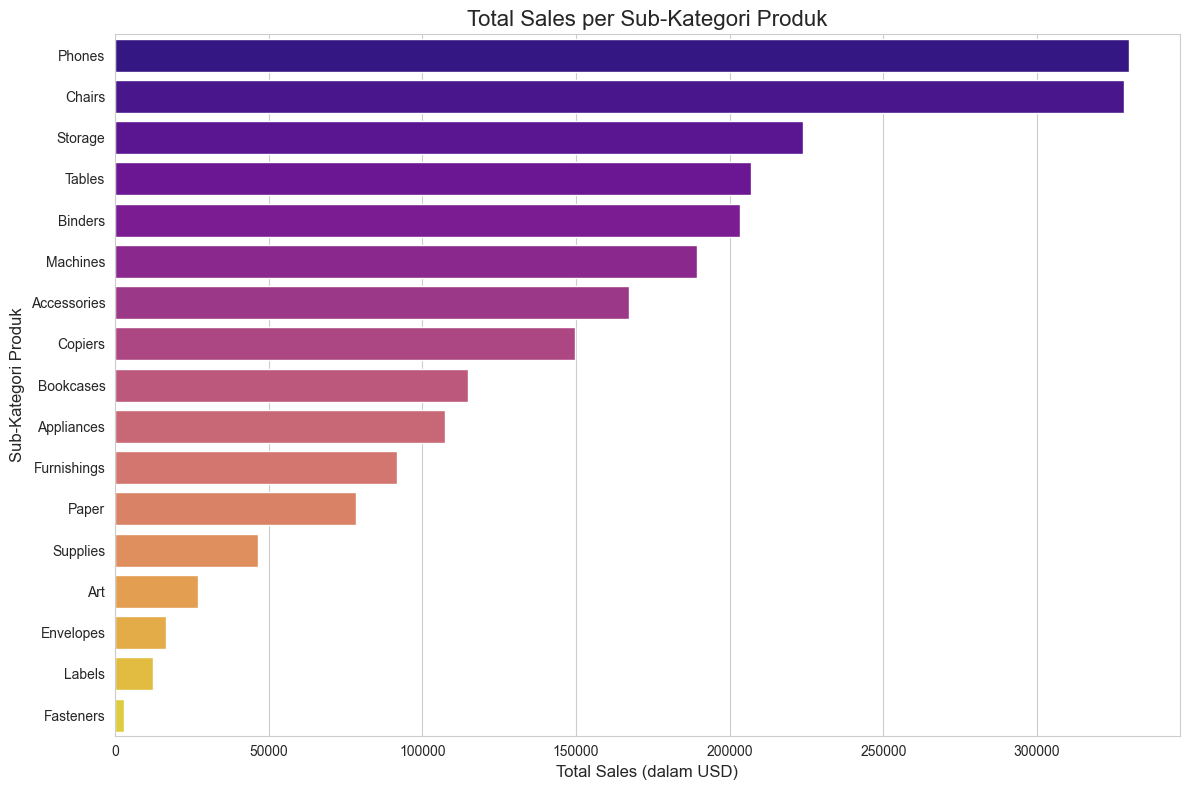

In [43]:
# a. Visualisasi Total Penjualan per Sub-Kategori
plt.figure(figsize=(12, 8))
sns.barplot(x=sales_sorted['Sales'], y=sales_sorted.index, palette="plasma", orient='h')
plt.title('Total Sales per Sub-Kategori Produk', fontsize=16)
plt.xlabel('Total Sales (dalam USD)', fontsize=12)
plt.ylabel('Sub-Kategori Produk', fontsize=12)
plt.tight_layout()
# Menyimpan gambar ke file
plt.savefig('sales_per_subkategori.png')
plt.show()

C:\Users\Dion\AppData\Local\Temp\ipykernel_8176\452605777.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_sorted['Profit'], y=profit_sorted.index, palette="viridis", orient='h')


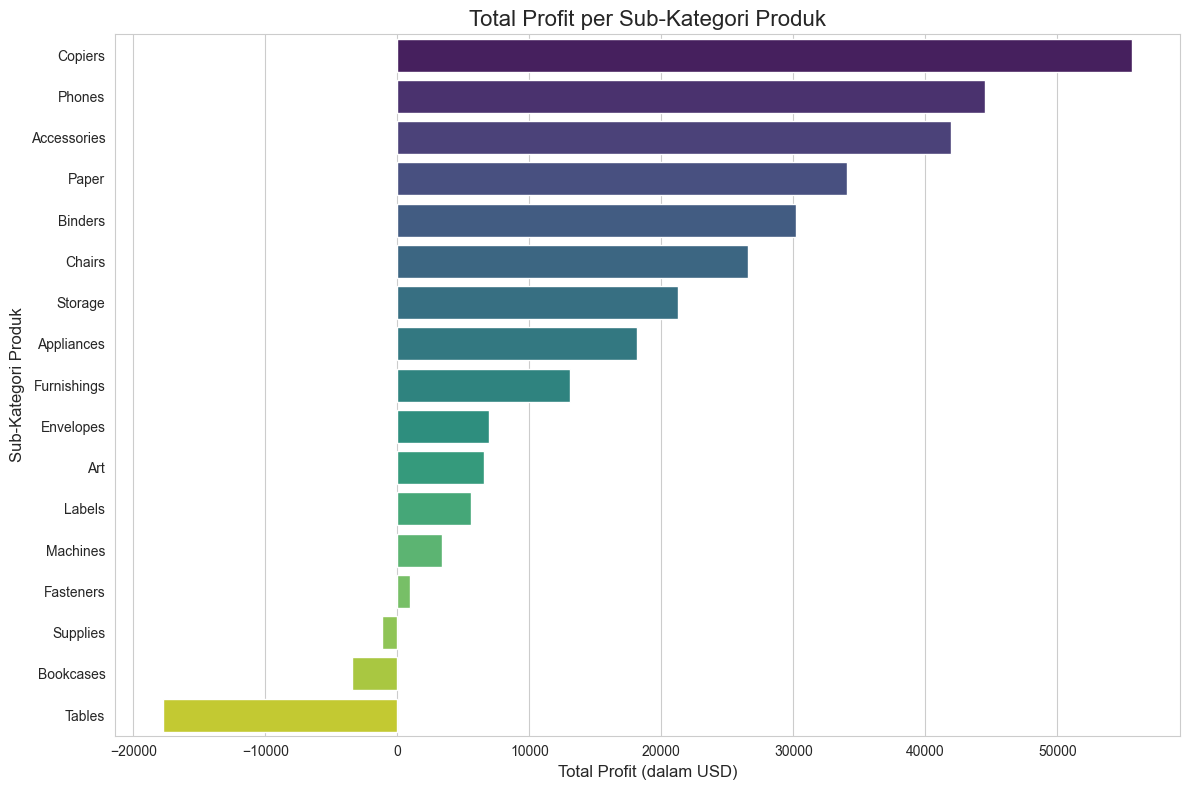

In [44]:
# b. Visualisasi Total Laba per Sub-Kategori
plt.figure(figsize=(12, 8))
sns.barplot(x=profit_sorted['Profit'], y=profit_sorted.index, palette="viridis", orient='h')
plt.title('Total Profit per Sub-Kategori Produk', fontsize=16)
plt.xlabel('Total Profit (dalam USD)', fontsize=12)
plt.ylabel('Sub-Kategori Produk', fontsize=12)
plt.tight_layout()
# Menyimpan gambar ke file
plt.savefig('profit_per_subkategori.png')
plt.show()

In [45]:
# Menampilkan 5 produk paling menguntungkan dan paling merugi
print("\n5 Sub-Kategori Paling Menguntungkan:")
print(profit_sorted.head(5))

print("\n5 Sub-Kategori Paling Merugi (atau paling tidak menguntungkan):")
print(profit_sorted.tail(5))


5 Sub-Kategori Paling Menguntungkan:
                   Sales      Profit
Sub-Category                        
Copiers       149528.030  55617.8249
Phones        330007.054  44515.7306
Accessories   167380.318  41936.6357
Paper          78479.206  34053.5693
Binders       203412.733  30221.7633

5 Sub-Kategori Paling Merugi (atau paling tidak menguntungkan):
                    Sales      Profit
Sub-Category                         
Machines      189238.6310   3384.7569
Fasteners       3024.2800    949.5182
Supplies       46673.5380  -1189.0995
Bookcases     114879.9963  -3472.5560
Tables        206965.5320 -17725.4811


4. Menganalisis Hubungan Diskon dan Laba

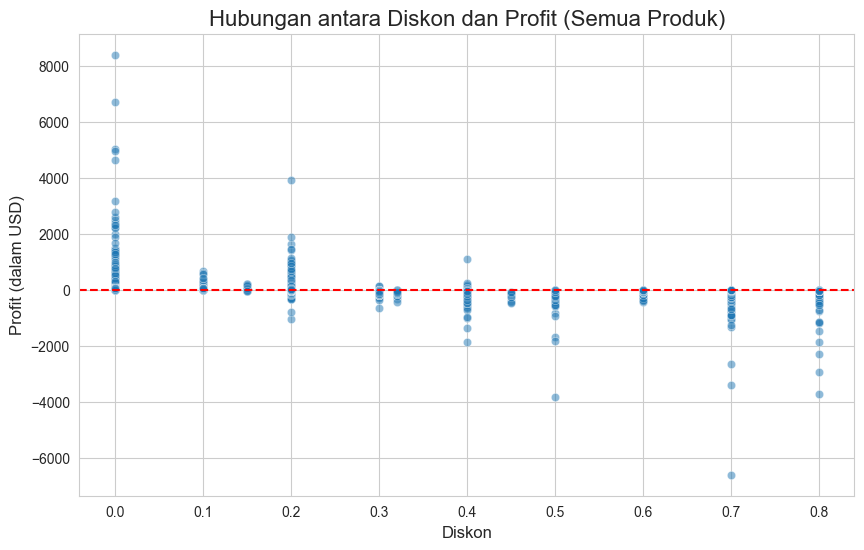

In [46]:
# a. Membuat scatter plot untuk semua produk
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.5)
plt.title('Hubungan antara Diskon dan Profit (Semua Produk)', fontsize=16)
plt.xlabel('Diskon', fontsize=12)
plt.ylabel('Profit (dalam USD)', fontsize=12)
plt.axhline(0, color='red', linestyle='--') # Garis batas laba/rugi
plt.savefig('diskon_vs_profit_semua.png')
plt.show()

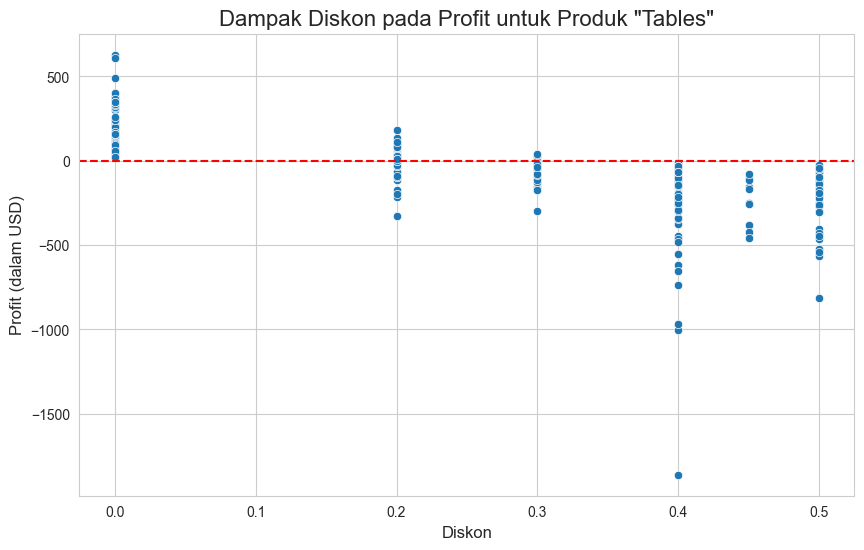

Rata-rata Diskon untuk Transaksi yang Merugi: 0.48088722608230894
Rata-rata Diskon untuk Transaksi yang Menguntungkan: 0.08104368329610324


In [47]:
# b. Fokus pada Sub-Kategori 'Tables' yang merugi
df_tables = df[df['Sub-Category'] == 'Tables']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df_tables)
plt.title('Dampak Diskon pada Profit untuk Produk "Tables"', fontsize=16)
plt.xlabel('Diskon', fontsize=12)
plt.ylabel('Profit (dalam USD)', fontsize=12)
plt.axhline(0, color='red', linestyle='--') # Garis batas laba/rugi
plt.savefig('diskon_vs_profit_tables.png')
plt.show()

# Menampilkan statistik diskon untuk produk yang merugi vs. menguntungkan
print("Rata-rata Diskon untuk Transaksi yang Merugi:", df[df['Profit'] < 0]['Discount'].mean())
print("Rata-rata Diskon untuk Transaksi yang Menguntungkan:", df[df['Profit'] > 0]['Discount'].mean())

5. Analisis Geografis

C:\Users\Dion\AppData\Local\Temp\ipykernel_8176\1769718547.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='Region', y='Sales', data=region_performance, palette='coolwarm')
C:\Users\Dion\AppData\Local\Temp\ipykernel_8176\1769718547.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='Region', y='Profit', data=region_performance, palette='coolwarm')


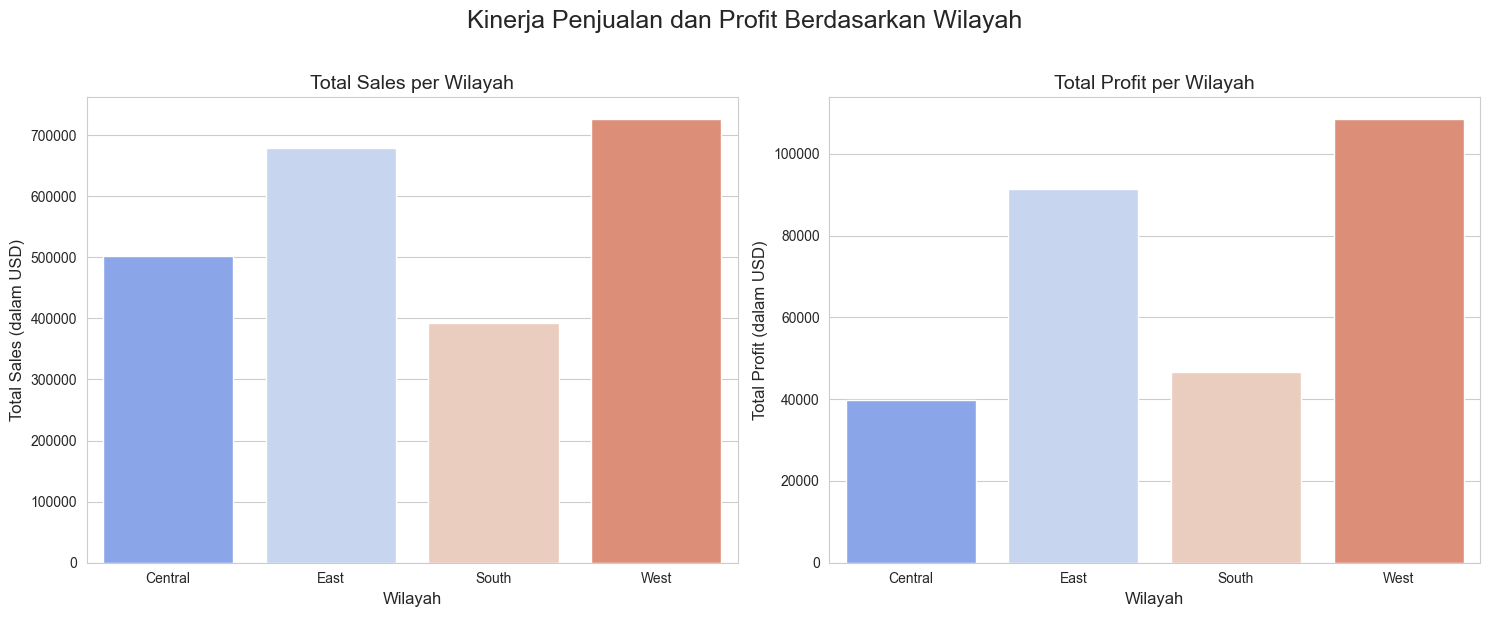

In [48]:
# a. Analisis berdasarkan Wilayah (Region)
region_performance = df.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Membuat dua subplot (satu untuk Sales, satu untuk Profit)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot untuk Sales per Wilayah
sns.barplot(ax=axes[0], x='Region', y='Sales', data=region_performance, palette='coolwarm')
axes[0].set_title('Total Sales per Wilayah', fontsize=14)
axes[0].set_xlabel('Wilayah', fontsize=12)
axes[0].set_ylabel('Total Sales (dalam USD)', fontsize=12)


# Plot untuk Profit per Wilayah
sns.barplot(ax=axes[1], x='Region', y='Profit', data=region_performance, palette='coolwarm')
axes[1].set_title('Total Profit per Wilayah', fontsize=14)
axes[1].set_xlabel('Wilayah', fontsize=12)
axes[1].set_ylabel('Total Profit (dalam USD)', fontsize=12)


plt.suptitle('Kinerja Penjualan dan Profit Berdasarkan Wilayah', fontsize=18, y=1.02)
plt.tight_layout()
plt.savefig('kinerja_per_wilayah.png')
plt.show()

In [49]:
state_performance = df.groupby('State').agg({'Sales': 'sum', 'Profit': 'sum'})
state_profit_sorted = state_performance.sort_values(by='Profit', ascending=False)

# Menampilkan 10 negara bagian dengan profit tertinggi dan terendah
# Mengambil 10 negara bagian paling menguntungkan dan 10 paling merugi
top_10_profit_states = state_profit_sorted.head(10)
bottom_10_profit_states = state_profit_sorted.tail(10)


C:\Users\Dion\AppData\Local\Temp\ipykernel_8176\3647817544.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_profit_states['Profit'], y=top_10_profit_states.index, palette='Greens_r', orient='h')


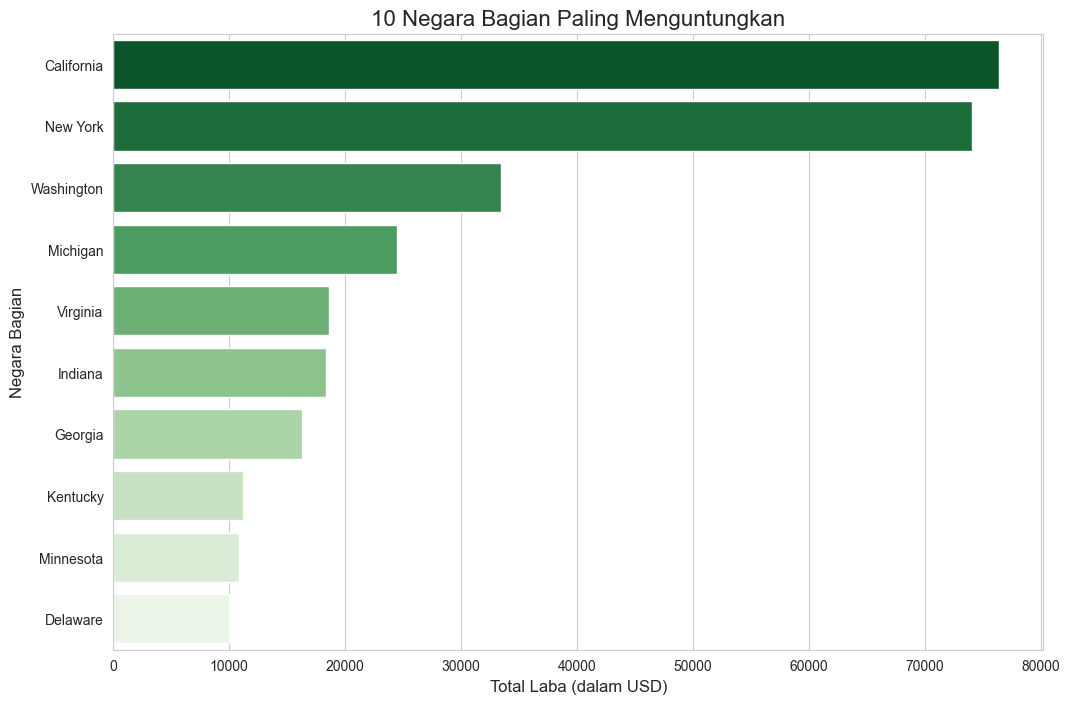

In [50]:
# Visualisasi 10 Negara Bagian Paling Menguntungkan dan Paling Merugi
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_profit_states['Profit'], y=top_10_profit_states.index, palette='Greens_r', orient='h')
plt.title('10 Negara Bagian Paling Menguntungkan', fontsize=16)
plt.xlabel('Total Laba (dalam USD)', fontsize=12)
plt.ylabel('Negara Bagian', fontsize=12)
plt.savefig('top_10_laba_negara_bagian.png')
plt.show()


C:\Users\Dion\AppData\Local\Temp\ipykernel_8176\4233606283.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_profit_states['Profit'], y=bottom_10_profit_states.index, palette='Reds_r', orient='h')


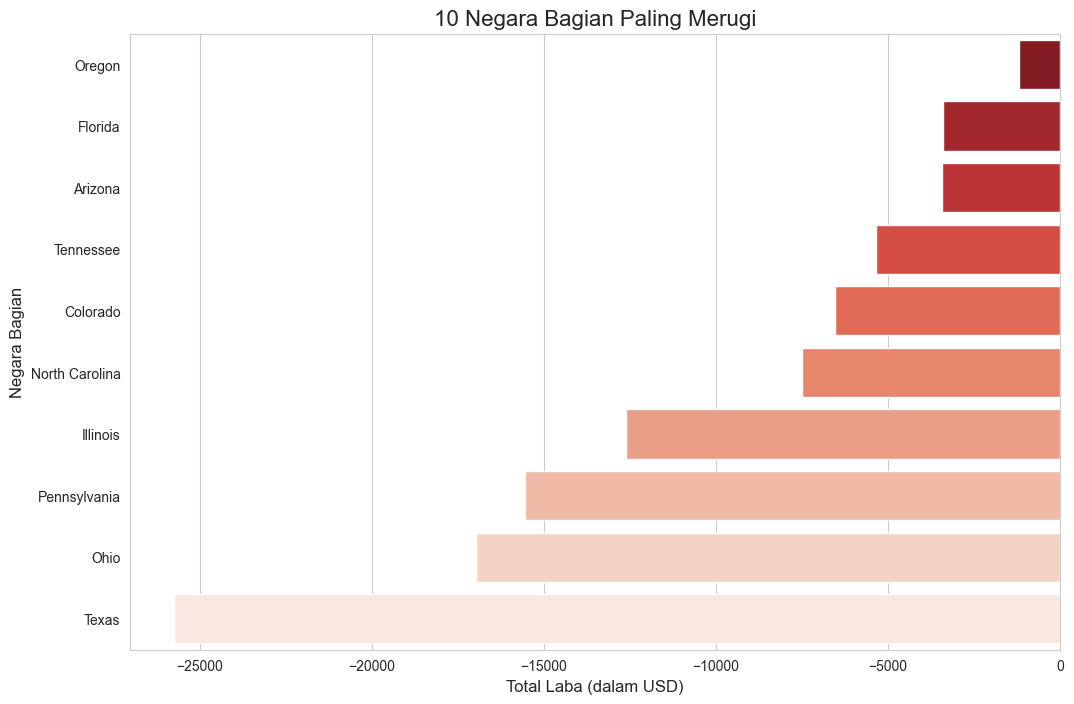

In [51]:
plt.figure(figsize=(12, 8))
sns.barplot(x=bottom_10_profit_states['Profit'], y=bottom_10_profit_states.index, palette='Reds_r', orient='h')
plt.title('10 Negara Bagian Paling Merugi', fontsize=16)
plt.xlabel('Total Laba (dalam USD)', fontsize=12)
plt.ylabel('Negara Bagian', fontsize=12)
plt.savefig('bottom_10_rugi_negara_bagian.png')
plt.show()

6. Analisis Tren Waktu (Time Series)

C:\Users\Dion\AppData\Local\Temp\ipykernel_8176\3230541186.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_time['Sales'].resample('M').sum()


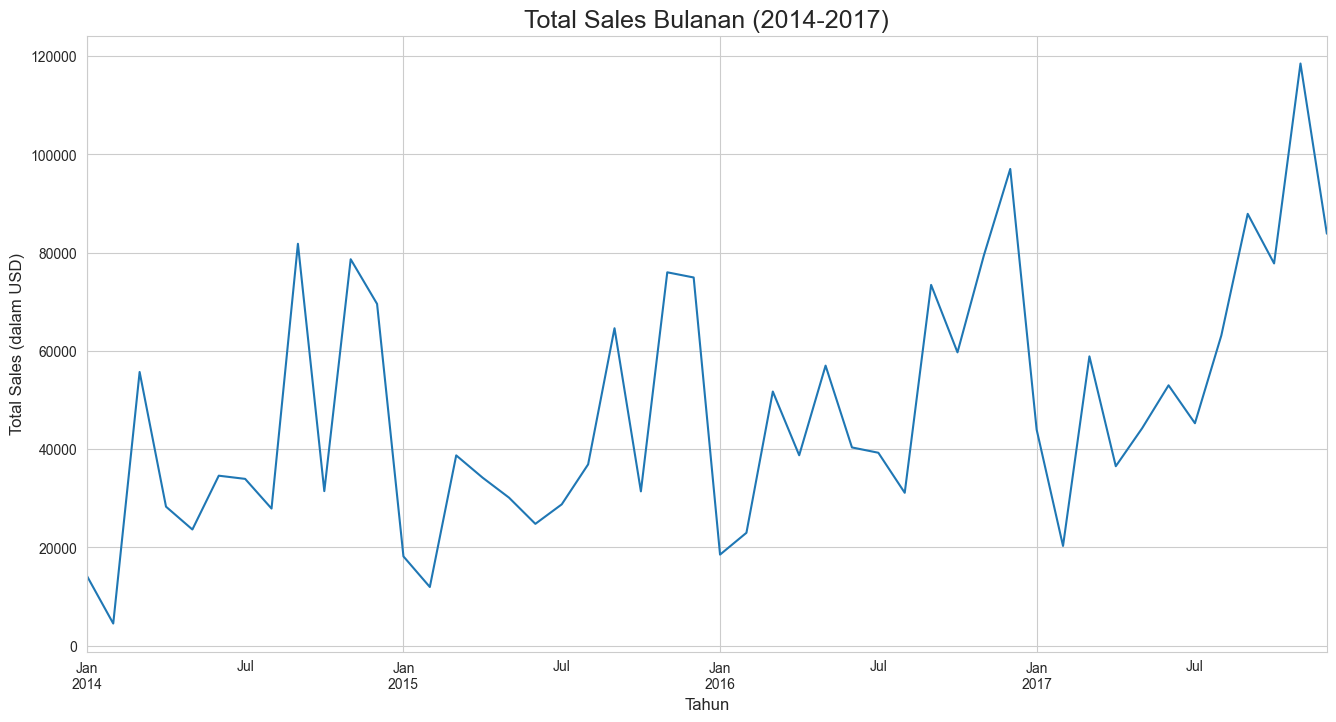

In [52]:
# Mengatur 'Order Date' sebagai index. Ini memudahkan analisis berbasis waktu.
# Kita akan bekerja dengan salinan dataframe agar tidak mengubah df asli
df_time = df.copy()
df_time.set_index('Order Date', inplace=True)

# Mengambil data penjualan bulanan. 'M' berarti 'Month End Frequency'.
# Kita menjumlahkan ('sum') penjualan untuk setiap bulan.
monthly_sales = df_time['Sales'].resample('M').sum()

# Membuat visualisasi tren penjualan bulanan
plt.figure(figsize=(16, 8))
monthly_sales.plot()

plt.title('Total Sales Bulanan (2014-2017)', fontsize=18)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Total Sales (dalam USD)', fontsize=12)
plt.grid(True)
plt.savefig('tren_sales_bulanan.png')
plt.show()

## Jawaban Pertanyaan Kunci Analisis Data Superstore

### 1. **APA yang laku dan apa yang tidak?**
- **Sub-kategori paling banyak terjual:**  
    - *Phones*, *Chairs*, dan *Storage* memiliki total penjualan tertinggi (`sales_sorted`).
- **Sub-kategori dengan profit tertinggi:**  
    - *Copiers*, *Phones*, dan *Accessories* memberikan profit tertinggi (`profit_sorted`).
- **Sub-kategori kurang laku/merugi:**  
    - *Tables* dan *Bookcases* mengalami kerugian terbesar, meskipun penjualannya tinggi.  
    - *Supplies* juga mencatat profit negatif.

### 2. **MENGAPA ada kerugian?**
- **Faktor penyebab kerugian:**  
    - Analisis scatter plot menunjukkan korelasi negatif antara diskon dan profit: semakin besar diskon, profit cenderung menurun.
    - Sub-kategori *Tables* sangat sensitif terhadap diskon, seringkali menyebabkan kerugian besar.
- **Faktor paling berpengaruh:**  
    - Diskon adalah faktor utama yang memicu profit negatif, terutama pada produk tertentu.  
    - Tidak ditemukan analisis khusus terkait biaya pengiriman sebagai penyebab utama kerugian.

### 3. **DI MANA letak kekuatan dan kelemahan pasar?**
- **Wilayah/negara bagian sumber profit terbesar:**  
    - Wilayah *West* dan *East* mencatatkan total penjualan dan profit tertinggi (`region_performance`).
    - Negara bagian paling menguntungkan: *California*, *New York*, dan *Washington* (`top_10_profit_states`).
- **Pasar titik lemah/penyumbang kerugian:**  
    - Negara bagian paling merugi: *Texas*, *Ohio*, dan *Pennsylvania* (`bottom_10_profit_states`).

### 4. **KAPAN waktu terbaik untuk menjual?**
- **Pola penjualan dan profit sepanjang tahun:**  
    - Penjualan bulanan cenderung meningkat dari tahun ke tahun, dengan lonjakan signifikan pada bulan-bulan tertentu (`monthly_sales`).
- **Bulan/periode lonjakan penjualan:**  
    - Lonjakan penjualan tertinggi terjadi pada bulan November dan Desember (musim liburan).
    - Periode kurang optimal biasanya di awal tahun (Januari–Februari).

## Insight Ringkasan Analisis Data Superstore

1. **Kinerja Sub-Kategori Produk**
    - Sub-kategori paling menguntungkan adalah *Copiers*, *Phones*, dan *Accessories*.
    - Sub-kategori *Tables* dan *Bookcases* justru mengalami kerugian, meskipun penjualannya tinggi.
    - Tidak semua sub-kategori dengan penjualan tinggi menghasilkan profit tinggi.

2. **Pengaruh Diskon terhadap Profit**
    - Terdapat korelasi negatif antara diskon dan profit: semakin besar diskon, profit cenderung menurun.
    - Sub-kategori *Tables* sangat sensitif terhadap diskon, seringkali menyebabkan kerugian besar.

3. **Analisis Geografis**
    - Wilayah *West* dan *East* mencatatkan total penjualan dan profit tertinggi.
    - Negara bagian paling menguntungkan: California, New York, dan Washington.
    - Negara bagian paling merugi: Texas, Ohio, dan Pennsylvania.

4. **Tren Waktu Penjualan**
    - Penjualan bulanan cenderung meningkat dari tahun ke tahun, dengan lonjakan signifikan pada bulan-bulan tertentu (misal: November dan Desember).
    - Terdapat pola musiman yang bisa dimanfaatkan untuk strategi promosi.

5. **Kesimpulan Umum**
    - Tidak semua produk dan wilayah memberikan kontribusi positif terhadap profit.
    - Strategi diskon perlu dievaluasi, terutama pada produk yang sensitif terhadap diskon.
    - Fokus pada produk dan wilayah yang konsisten memberikan profit tinggi dapat meningkatkan kinerja bisnis secara keseluruhan.